In [1]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load training dataset and split it into X and y vector
train = np.loadtxt('group15_train.txt')
X = train[:, 0:2]
y = train[:, 2]
val = np.loadtxt('group15_val.txt')
X_val = val[:, 0:2]
y_val = val[:, 2]
test = np.loadtxt('group15_test.txt')
X_test = test[:, 0:2]
y_test = test[:, 2]

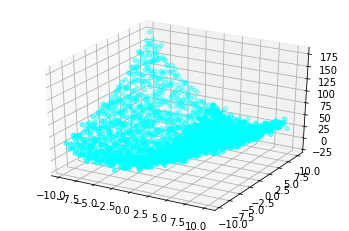

In [3]:
# simply visualising 3d data
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color='cyan')

In [4]:
# augmenting X before training
X_aug = np.ones((X.shape[0], 3))
X_aug[:, 1:3] = X
X_val_aug = np.ones((X_val.shape[0], 3))
X_val_aug[:, 1:3] = X_val
X_test_aug = np.ones((X_test.shape[0], 3))
X_test_aug[:, 1:3] = X_test

In [5]:
# finding parameter W, w
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X_aug), X_aug)), np.transpose(X_aug)), y)

In [6]:
# make predictions
y_prediction = np.dot(X_aug, W)
y_val_prediction = np.dot(X_val_aug, W)
y_test_prediction = np.dot(X_test_aug, W)

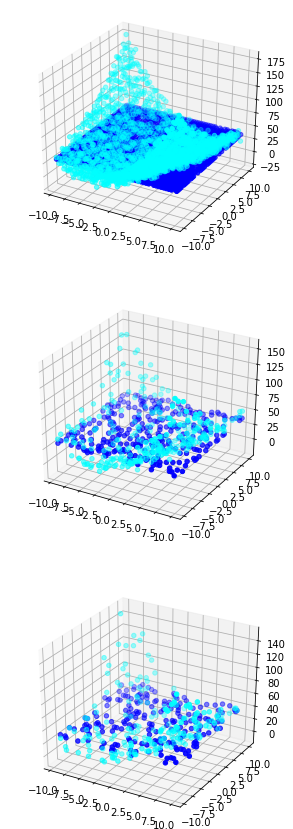

In [7]:
# visualise training data and linear fit
plt.rcParams['figure.figsize'] = [5, 15]
fig = plt.figure()
ax = fig.add_subplot(311, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color='cyan')
ax.scatter(X[:, 0], X[:, 1], y_prediction, color='blue')
ax = fig.add_subplot(312, projection = '3d')
ax.scatter(X_val[:, 0], X_val[:, 1], y_val, color='cyan')
ax.scatter(X_val[:, 0], X_val[:, 1], y_val_prediction, color='blue')
ax = fig.add_subplot(313, projection = '3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='cyan')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test_prediction, color='blue')

In [9]:
# Performance check
trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-y)))
vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-y_val)))
testlossRMS = np.sqrt(np.mean(np.square(y_test_prediction-y_test)))
{'train loss': trainlossRMS, 'validation loss': vallossRMS, 'test loss': testlossRMS}

{'train loss': 33.96123481198678,
 'validation loss': 32.8379515496923,
 'test loss': 33.053547010721296}

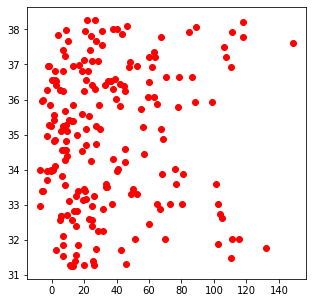

In [10]:
# Scatter plot
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(y_test, y_test_prediction, color='red')